# Time Series Forecasting

A time series problem in machine learning is a problem where the goal is to make predictions or forecasts based on time-dependent data. 

### Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
pip install pycaret
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pycaret.time_series import *
import logging

mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

### Loading the Dataset

The dataset contains monthly measurements of atmospheric carbon dioxide (CO2) concentrations recorded at the Mauna Loa Observatory in Hawaii. 

In [ ]:
data = pd.read_csv('mauna_loa_co2.csv', index_col = 'datetime',
                   parse_dates = True) 
data.head(10)

CO2
datetime          
1958-03-31  315.70
1958-04-30  317.45
1958-05-31  317.51
1958-06-30  317.25
1958-07-31  315.86
1958-08-31  314.93
1958-09-30  313.21
1958-10-31  312.44
1958-11-30  313.33
1958-12-31  314.67

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 1958-03-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     766 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


### Time Series Analysis

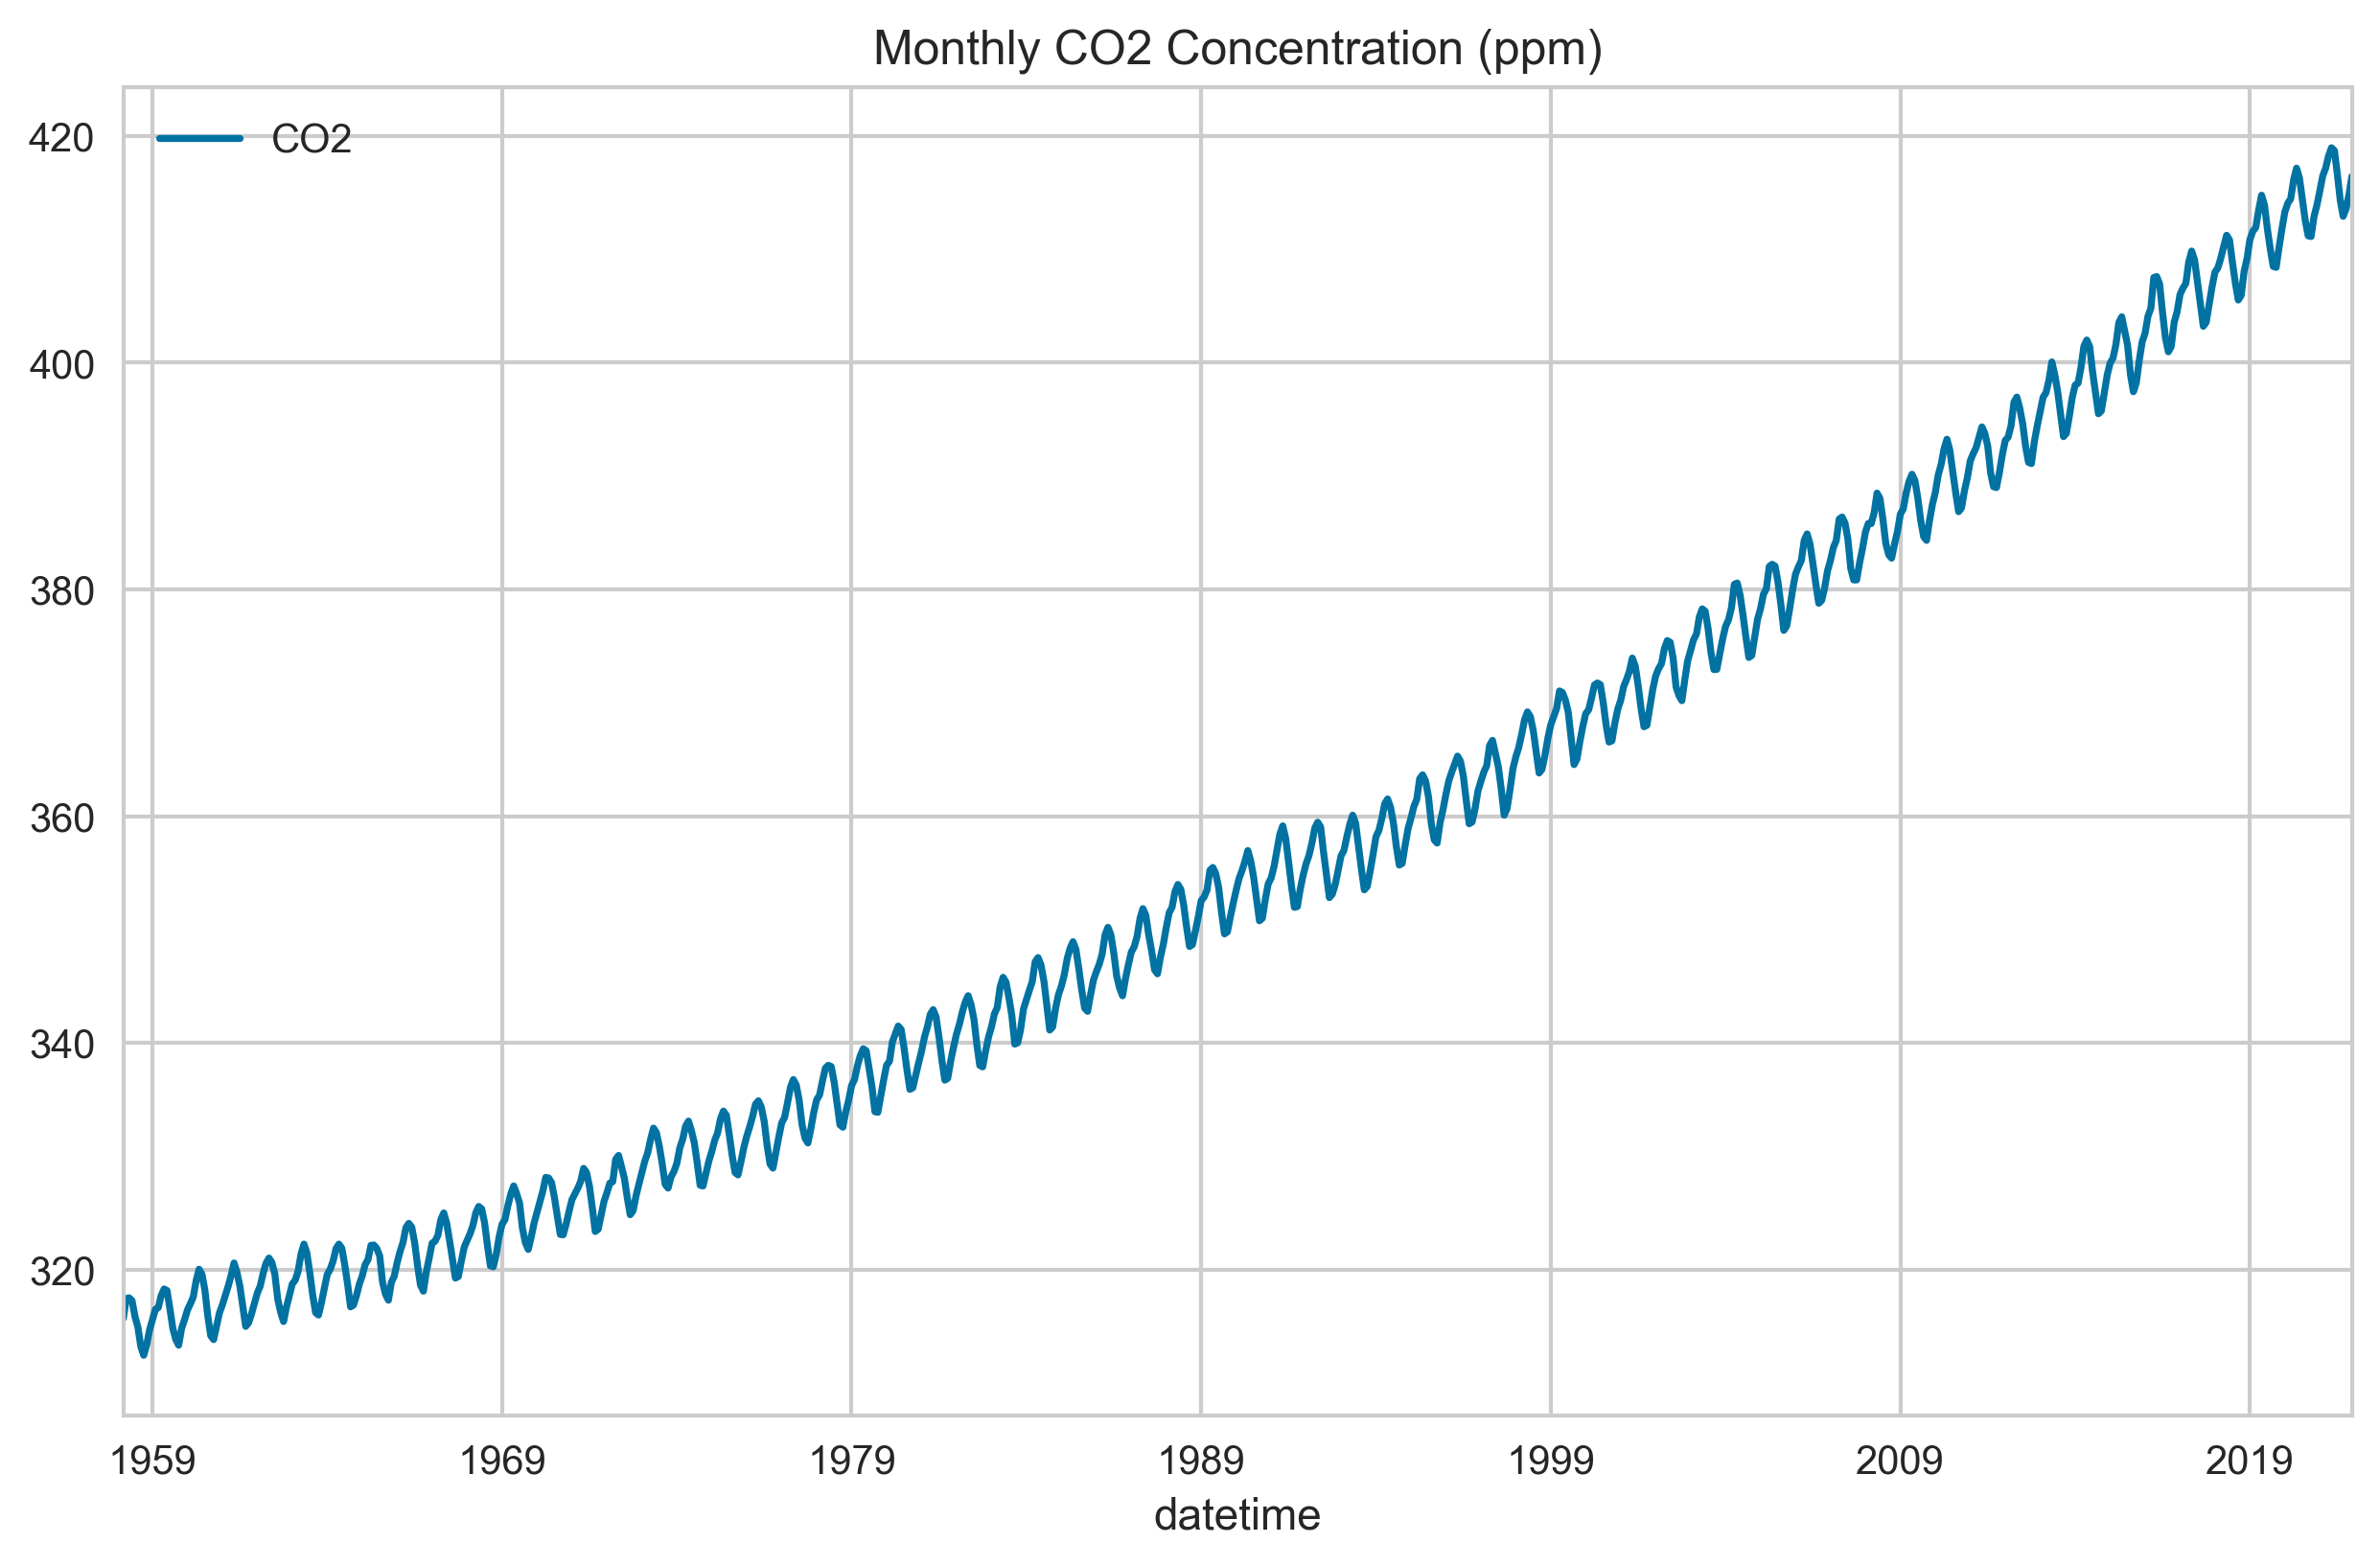

In [ ]:
# Plot the data using a line plot
# Set the figure size to 10 inches wide by 6 inches tall
data.plot(figsize=(10, 6))

# Set the title of the plot
plt.title('Monthly CO2 Concentration (ppm)')

# Display the plot
plt.show()

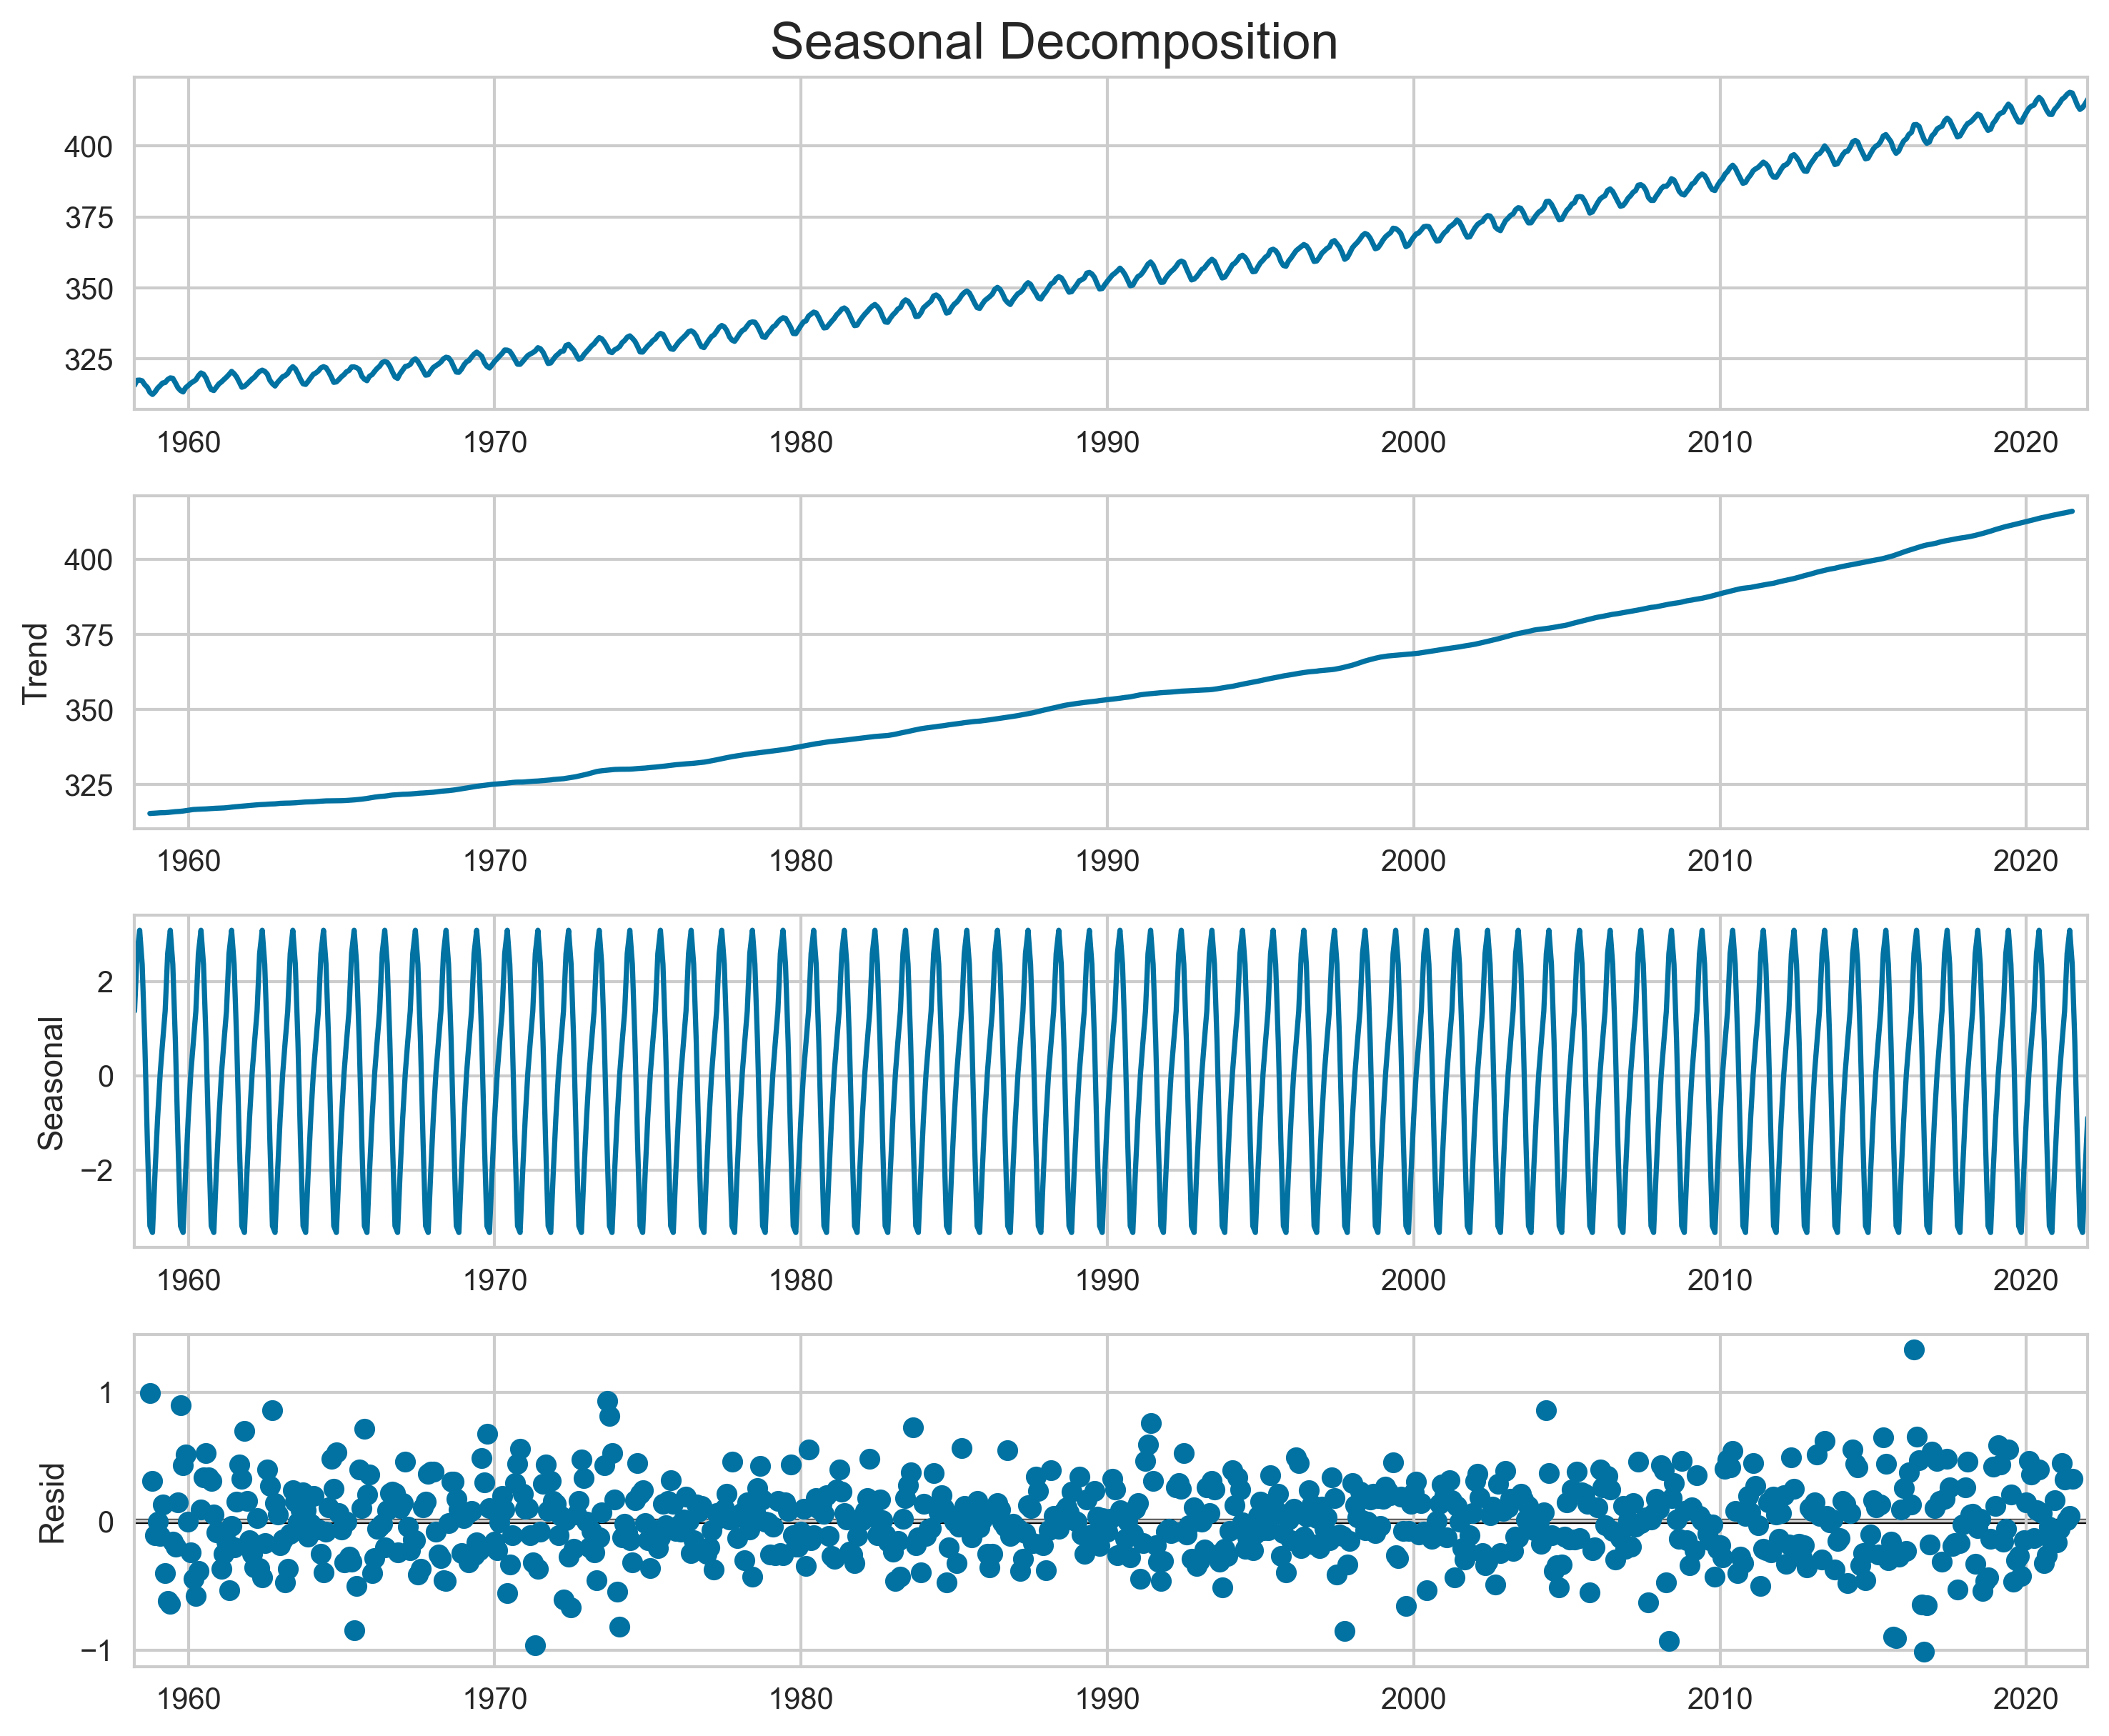

In [ ]:
# Set the default figure size for matplotlib
mpl.rcParams['figure.figsize'] = (10, 8)

# Perform seasonal decomposition on the data using the statsmodels library
result = seasonal_decompose(data)

# Plot the seasonal decomposition using the result object
# Set the title of the plot to 'Seasonal Decomposition'
# Set the vertical spacing between the title and the plot to 0.01 times the height of the plot
# Set the font size of the title to 'x-large'
result.plot().suptitle('Seasonal Decomposition', y=1.01, size='x-large')

# Display the plot
plt.show()

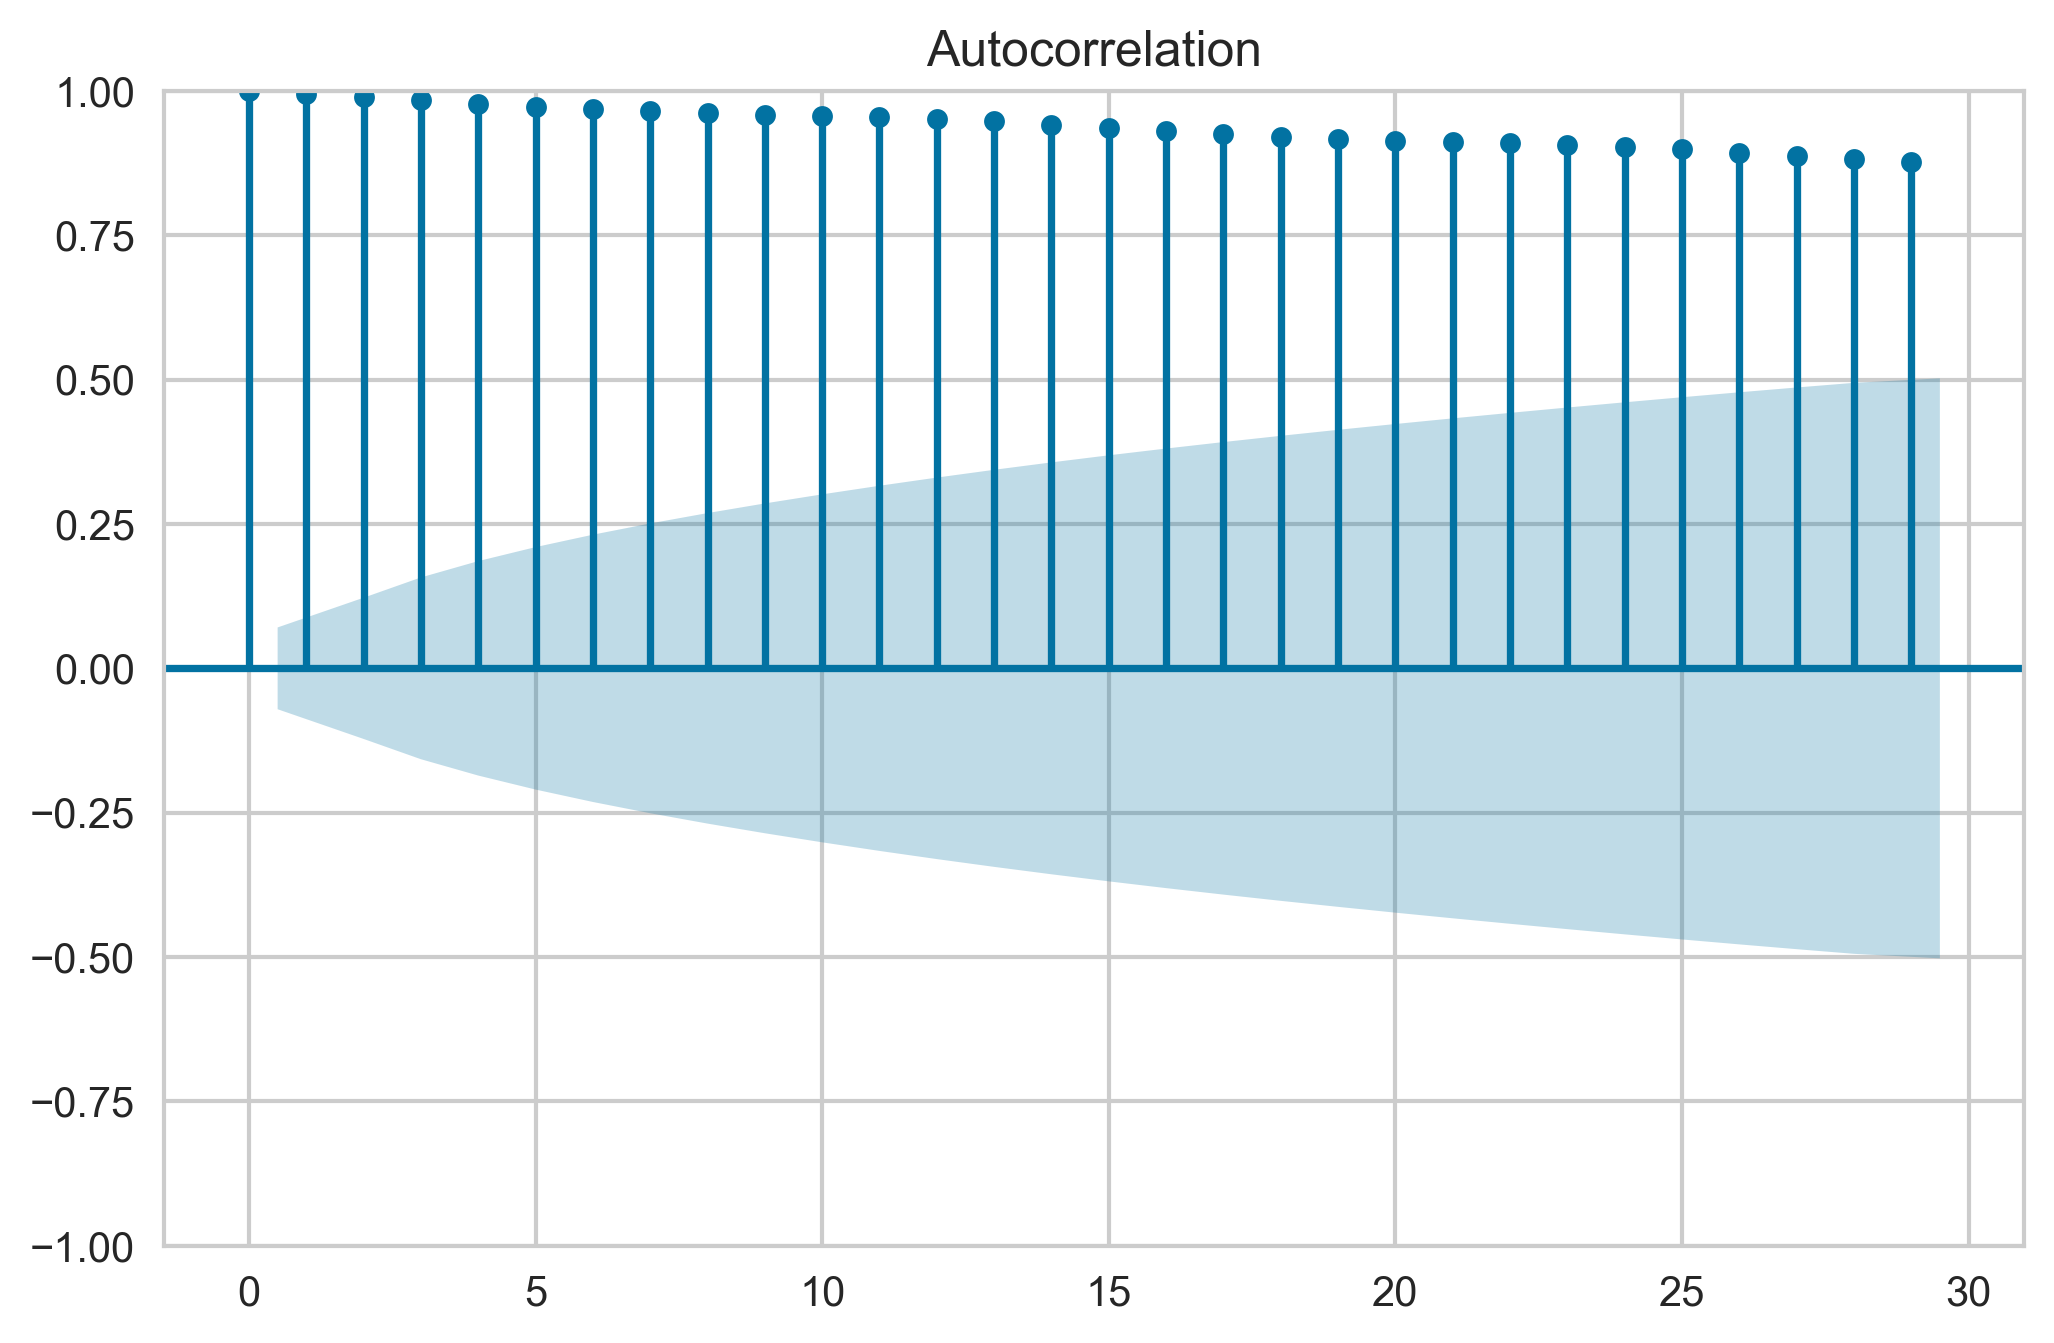

In [ ]:
# Create a new figure and axis object with a size of 8 inches wide by 5 inches tall
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the autocorrelation function (ACF) of the data on the axis object
# Set the axis object to be used for plotting to 'ax'
plot_acf(data, ax=ax)

# Display the plot
plt.show()

### Initializing the PyCaret Environment

In [ ]:
# Set up the time series data using the PyCaret library
# Use the 'data' DataFrame as the input data
# Set the forecast horizon to 36 (i.e. forecast the next 36 periods)
# Set the session ID to 6501 for reproducibility
ts = setup(data, fh=36, session_id=6501)

### Running Statistical Tests

In [ ]:
# Use the check_stats() function to check the stationarity of the time series
# Use the 'test' parameter to specify the type of stationarity test to perform
# Set the 'test' parameter to 'stationarity' to perform a stationarity test
check_stats(test='stationarity')


Test Test Name         Data             Property          Setting  \
0   Stationarity       ADF  Transformed         Stationarity  {'alpha': 0.05}   
1   Stationarity       ADF  Transformed              p-value  {'alpha': 0.05}   
2   Stationarity       ADF  Transformed       Test Statistic  {'alpha': 0.05}   
3   Stationarity       ADF  Transformed    Critical Value 1%  {'alpha': 0.05}   
4   Stationarity       ADF  Transformed    Critical Value 5%  {'alpha': 0.05}   
5   Stationarity       ADF  Transformed   Critical Value 10%  {'alpha': 0.05}   
6   Stationarity      KPSS  Transformed   Trend Stationarity  {'alpha': 0.05}   
7   Stationarity      KPSS  Transformed              p-value  {'alpha': 0.05}   
8   Stationarity      KPSS  Transformed       Test Statistic  {'alpha': 0.05}   
9   Stationarity      KPSS  Transformed   Critical Value 10%  {'alpha': 0.05}   
10  Stationarity      KPSS  Transformed    Critical Value 5%  {'alpha': 0.05}   
11  Stationarity      KPSS  Transformed  Critical Value 2.5%  {'alpha': 0.05}   
12  Stationarity      KPSS  Transformed    Critical Value 1%  {'alpha': 0.05}   

       Value  
0      False  
1        1.0  
2   5.383263  
3  -3.439158  
4  -2.865427  
5   -2.56884  
6      False  
7       0.01  
8   1.035972  
9      0.119  
10     0.146  
11     0.176  
12     0.216

### Comparing Forecasting Models

In [ ]:
# Use the compare_models() function to compare the performance of different time series models
# Use the 'sort' parameter to specify the metric by which to sort the results
# Set the 'sort' parameter to 'RMSE' to sort the results by mean absolute percentage error
compare_models(sort='RMSE')

Processing:   0%|          | 0/125 [00:00<?, ?it/s]

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

### Creating the Model

In [ ]:
# Use the create_model() function to create an exponential smoothing model
# Use the 'exp_smooth' string as the input to the 'create_model()' function to specify the type of model to create
model = create_model('exp_smooth')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotting the Model

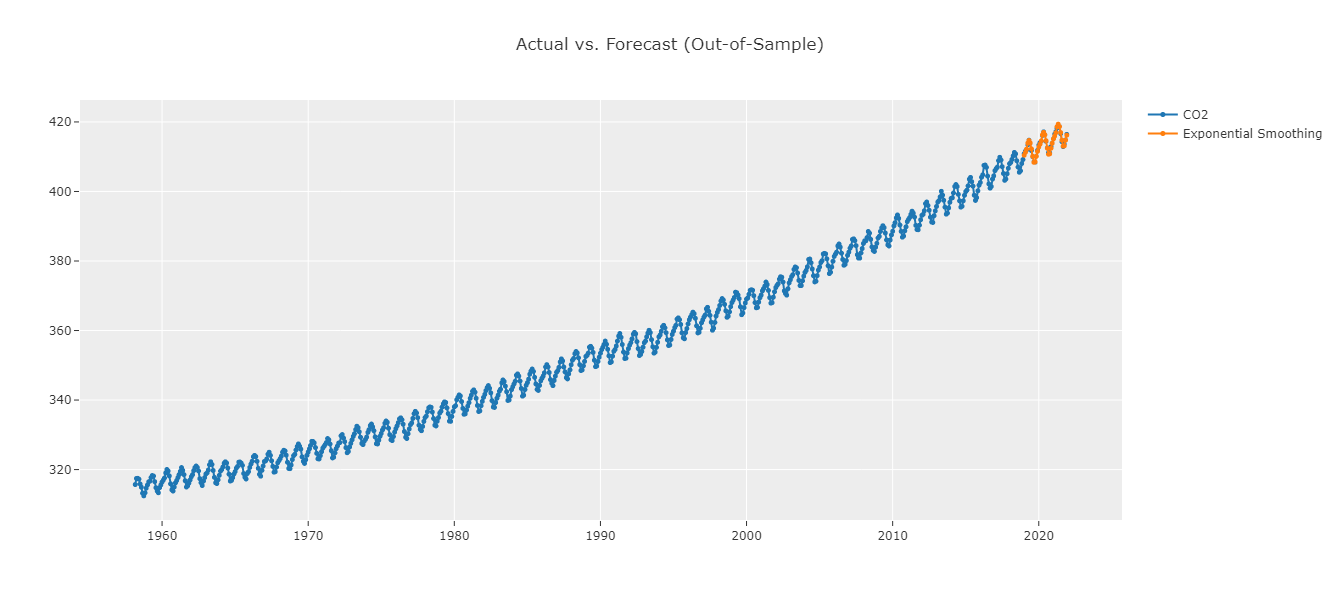

In [ ]:
# Define a dictionary of keyword arguments for the figure used in the plot_model() function
# Set the renderer to 'jupyterlab' for compatibility with JupyterLab
# Set the height of the figure to 600 pixels and the width to 1000 pixels
fig_kwargs = {'renderer': 'jupyterlab', 'height': 600, 'width': 1000}

# Use the plot_model() function to plot the forecast produced by the 'exp_smooth' model
# Use the 'model' object as the input model to the 'plot_model()' function
# Set the type of plot to 'forecast'
# Use the 'fig_kwargs' parameter to pass in the keyword arguments for the figure
plot_model(model, 'forecast', fig_kwargs=fig_kwargs)

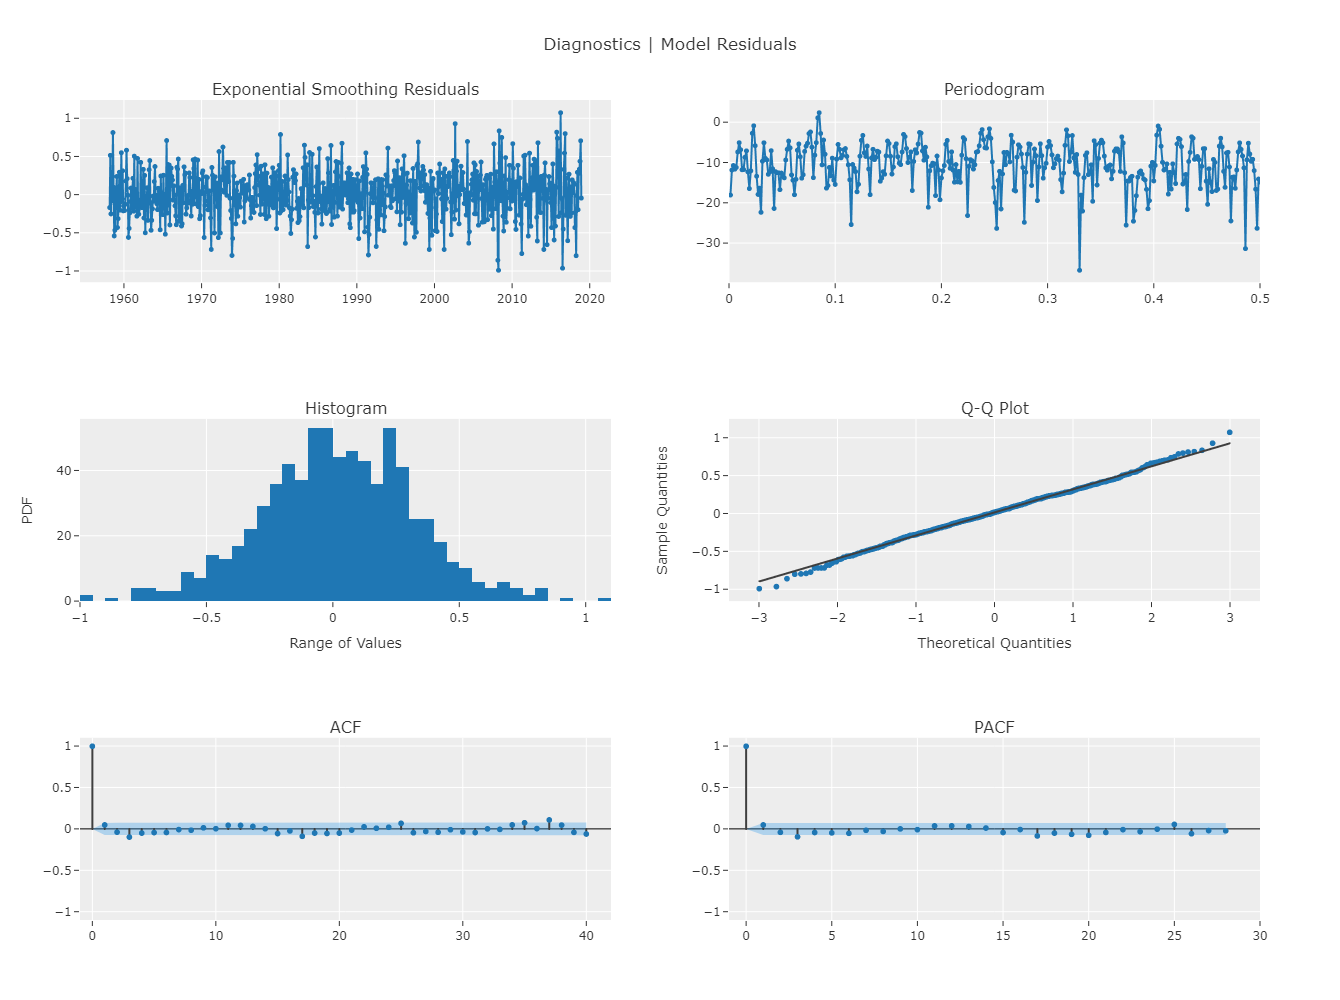

In [ ]:
# Define a dictionary of keyword arguments for the figure used in the plot_model() function
# Set the renderer to 'jupyterlab' for compatibility with JupyterLab
# Set the height of the figure to 1000 pixels and the width to 1000 pixels
fig_kwargs = {'renderer': 'jupyterlab', 'height': 1000, 'width': 1000}

# Use the plot_model() function to plot the diagnostics produced by the 'exp_smooth' model
# Use the 'model' object as the input model to the 'plot_model()' function
# Set the type of plot to 'diagnostics'
# Use the 'fig_kwargs' parameter to pass in the keyword arguments for the figure
plot_model(model, 'diagnostics', fig_kwargs=fig_kwargs)


### Making Predictions

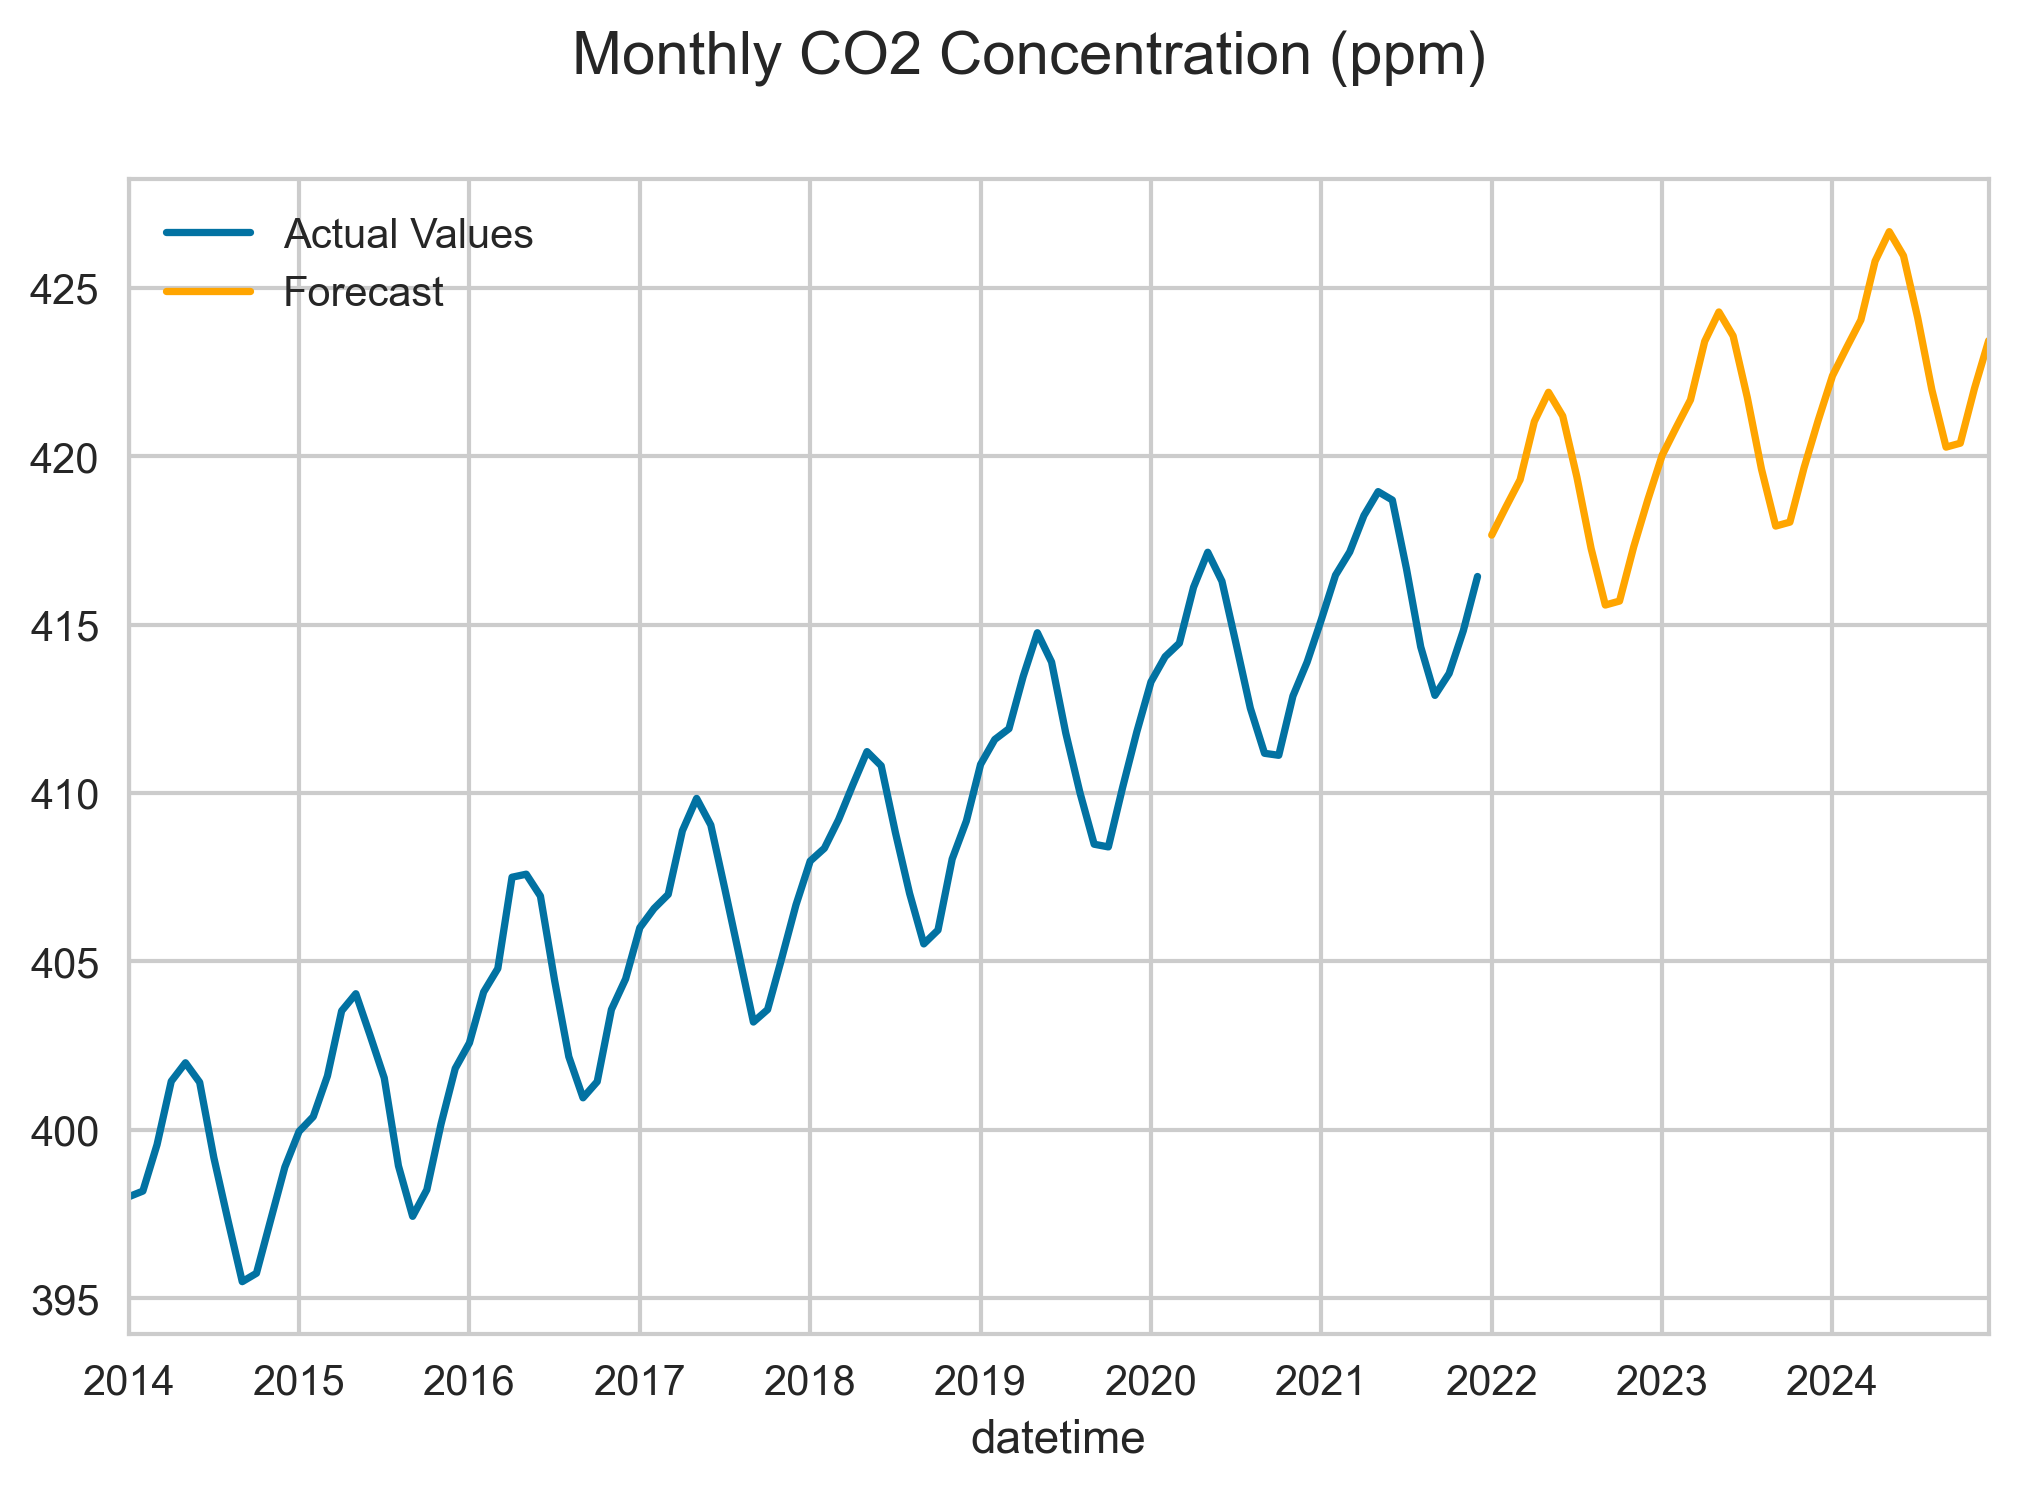

In [ ]:
# Use the finalize_model() function to finalize the 'exp_smooth' model
# The 'finalize_model()' function performs a final fit of the model on the entire dataset
model = finalize_model(model)

# Use the predict_model() function to generate a forecast using the finalized model
# Set the 'fh' parameter to 36 to generate a forecast for the next 36 periods (i.e. 3 years)
pred = predict_model(model, fh=36)

# Use the matplotlib library to plot the actual values and forecast generated by the model
# Create a new figure with a size of 8x5 inches
fig, ax = plt.subplots(figsize=(8,5))

# Set the title of the figure to 'Monthly CO2 Concentration (ppm)'
fig.suptitle('Monthly CO2 Concentration (ppm)')

# Plot the last 96 data points from the original dataset on the figure
data[-96:].plot(ax=ax)

# Plot the forecast generated by the model on the same figure
pred.plot(ax=ax, color='orange')

# Add a legend to the figure
ax.legend(['Actual Values', 'Forecast'])

# Show the figure
plt.show()

In [ ]:
# Use the save_model() function to save the 'exp_smooth' model to a file
# The first argument is the trained model object that you want to save
# The second argument is the name of the file that you want to save the model to
save_model(model, "exp_smooth_model")

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 ExponentialSmoothing(seasonal='mul',
                                                                                                                                                      sp=12,
                                                                                                                                                      trend='add'))]))]))]))]),
 'exp_smooth_model.pkl')